In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Assignments

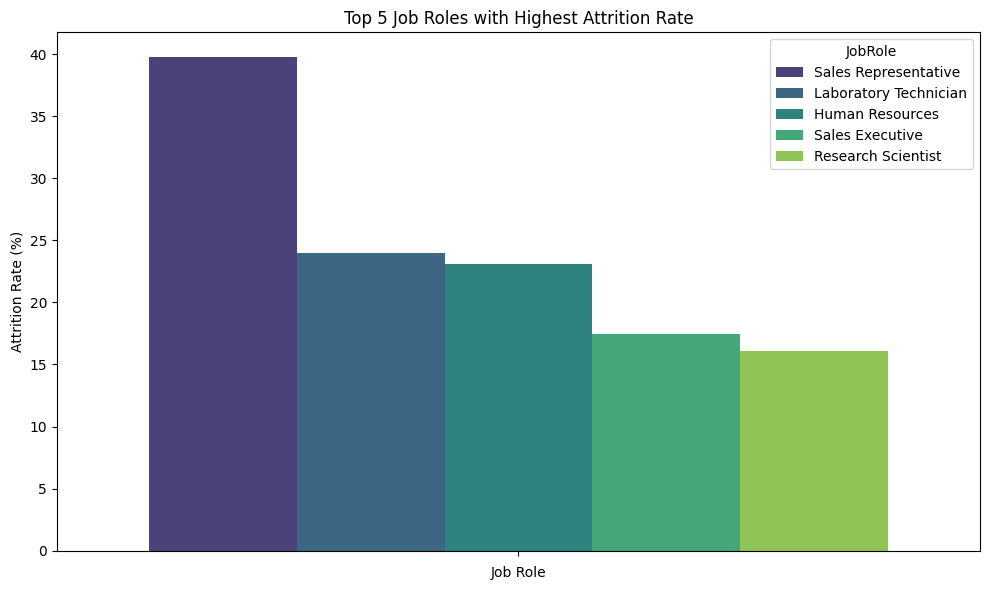

Attrition,No,Yes,Rate
JobRole,,,
Sales Representative,50,33,39.759036
Laboratory Technician,197,62,23.938224
Human Resources,40,12,23.076923
Sales Executive,269,57,17.484663
Research Scientist,245,47,16.095890


In [19]:
# 1. Find the Top 5 Job Roles with the Highest Attrition Rate.
#.unstack() -- Converts the inner level (Attrition) from row index to columns.
attrition = df.groupby('JobRole')['Attrition'].value_counts().unstack()
attrition['Rate'] = (attrition['Yes'] / (attrition['Yes'] + attrition['No']))*100
top_5 = attrition.sort_values(by='Rate', ascending=False).head(5)


plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5,
    hue=top_5.index,
    y='Rate',
    palette='viridis'
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Customize the plot
plt.title('Top 5 Job Roles with Highest Attrition Rate')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()
# Show the plot
plt.show()
top_5

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20704\1757259776.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20704\1757259776.py:9: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(


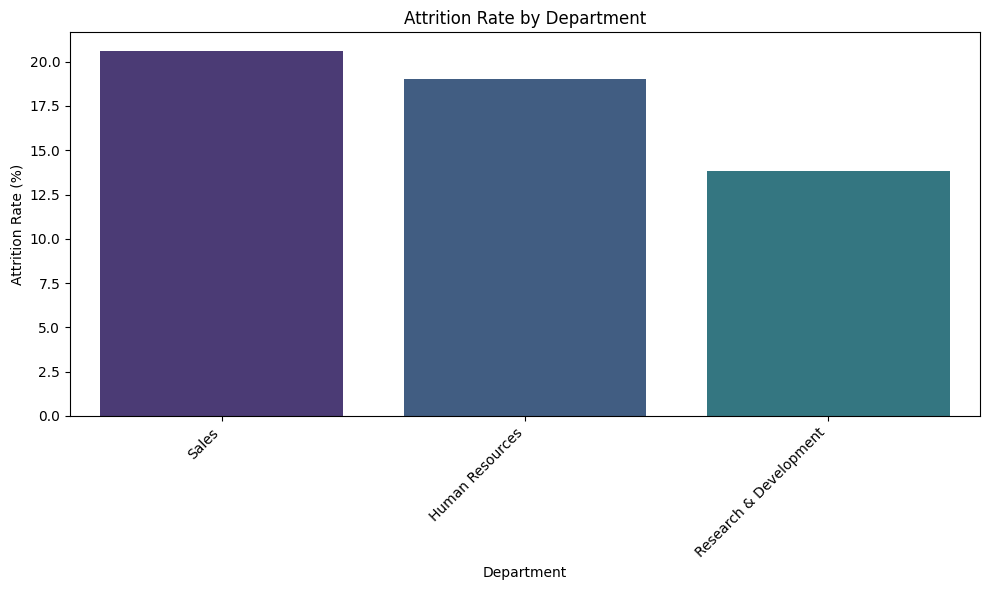

The dept with highest attrition rate : Sales with rate as : 20.63%


In [20]:
#2. Identify which Department has the Highest Attrition Rate.
attrition = df.groupby('Department')['Attrition'].value_counts().unstack()
attrition['Rate'] = (attrition['Yes'] / (attrition['Yes'] + attrition['No']))*100
dept = attrition.sort_values(by='Rate', ascending=False)
dept.reset_index()['Department']


plt.figure(figsize=(10, 6))
sns.barplot(
    data=dept.reset_index(),  # Reset the index for easy plotting
    x='Department',
    y='Rate',
    palette=sns.color_palette('viridis')  # Updated way to set the color palette
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Customize the plot
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()
dept
print(f"The dept with highest attrition rate : {dept.reset_index()['Department'][0]} with rate as : {dept['Rate'].iloc[0]:.2f}%")


In [5]:
#3. Compare Attrition Rate for Employees Working Overtime vs Not.
attrition = df.groupby('OverTime')['Attrition'].value_counts().unstack()
attrition['Rate'] = (attrition['Yes'] / (attrition['Yes'] + attrition['No']))*100

attrition.reset_index()

#OverTime = Yes: 127 employees left out of 416 total → 30.53% attrition rate
#OverTime = No: 110 employees left out of 1054 total → 10.44% attrition rate

Attrition,OverTime,No,Yes,Rate
0,No,944,110,10.436433
1,Yes,289,127,30.528846


In [6]:
#4. Find the Average Monthly Income of Employees Who Left vs Stayed.
average_income = df.groupby('Attrition')['MonthlyIncome'].mean()
average_income.reset_index()

#Employees who stayed (Attrition = No) have a higher average monthly income (~₹6832.74).
#Employees who left (Attrition = Yes) have a lower average monthly income (~₹4787.09).
#Lower income is associated with higher attrition.
#This suggests that salary may be a significant factor contributing to employees leaving the company.

,Attrition,MonthlyIncome
0,No,6832.739659
1,Yes,4787.092827


In [7]:
#5. Compare Attrition Rates by Marital Status.
attr_by_marital = df.groupby('MaritalStatus')['Attrition'].value_counts().unstack()
attr_by_marital.reset_index()

#Single employees have the highest attrition rate (~25.5%) — more likely to leave.
#Married employees show moderate attrition (~12.5%).
#Divorced employees have the lowest attrition rate (~10.1%).
#Marital status appears to be strongly correlated with attrition:
#Single employees may be more mobile or seeking better opportunities.
#Married/Divorced employees might have more stability or responsibility, leading to longer retention.

Attrition,MaritalStatus,No,Yes
0,Divorced,294,33
1,Married,589,84
2,Single,350,120


In [8]:
#6. Analyze if Younger Employees (Age < 30) are Leaving More Frequently.
age_attr = df.groupby('Attrition').apply(lambda x : (x['Age']<30).sum())
age_attr.reset_index(name='Under_30_count')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19340\1014239928.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_attr = df.groupby('Attrition').apply(lambda x : (x['Age']<30).sum())


,Attrition,Under_30_count
0,No,235
1,Yes,91


In [9]:
younger_df = df[df['Age'] < 30]
#younger_attr = younger_df.groupby('Attrition')['Age'].count()
younger_attr = younger_df['Attrition'].value_counts()
younger_attr.reset_index(name="Under_30")

#Attrition rate for younger employees
younger_attr_rate = (younger_attr['Yes'] / (younger_attr['Yes'] + younger_attr['No'])) * 100
print(f"Attrition rate for employees under 30: {younger_attr_rate:.2f}") 

#Overall attrition rate 
overall_attr = df.groupby('Attrition').size()
overall_attr_rate = (overall_attr['Yes'] / (overall_attr['Yes'] + overall_attr['No'])) * 100
print(f"Overall Attrition rate: {overall_attr_rate:.2f}%")

#Younger employees (under 30) have a significantly higher attrition rate compared to the overall workforce.
#27.91% of employees under 30 have left the company, which is almost twice the overall attrition rate of 16.12%.

Attrition rate for employees under 30: 27.91
Overall Attrition rate: 16.12%


In [10]:
#7. Find the Top 3 Education Fields with Highest Attrition Rates.
edu = df.groupby('EducationField')['Attrition'].value_counts().unstack()
edu['Attr_Rate'] = (edu['Yes'] / (edu['Yes'] + edu['No'])) * 100
edu.reset_index(inplace=True)
top_3 = edu.sort_values(by='Attr_Rate', ascending=False)
top_3.head(3)

#Human Resources has the highest attrition rate (~25.93%), even though the total number of employees is low.
#Technical Degree and Marketing also have high attrition rates (24.24% and 22.01%, respectively).
#This suggests that employees in these three education fields are leaving more frequently compared to others.

Attrition,EducationField,No,Yes,Attr_Rate
0,Human Resources,20,7,25.925926
5,Technical Degree,100,32,24.242424
2,Marketing,124,35,22.012579


In [11]:
#8. Check if Employees with Low Job Satisfaction are Leaving More.
job_attr = df.groupby('JobSatisfaction')['Attrition'].value_counts().unstack()
job_attr['Attr_Rate'] = (job_attr['Yes'] / (job_attr['Yes'] + job_attr['No'])) * 100
job_attr.reset_index()
job_attr

#Lower job satisfaction (1) is clearly associated with the highest attrition rate (~22.84%).
#As job satisfaction increases, the attrition rate decreases.
#Employees with the highest job satisfaction (4) have the lowest attrition rate (11.33%).

Attrition,No,Yes,Attr_Rate
JobSatisfaction,,,
1,223,66,22.837370
2,234,46,16.428571
3,369,73,16.515837
4,407,52,11.328976


In [12]:
#11. Compare Attrition Rate by Gender.
gen = df.groupby('Gender')['Attrition'].value_counts().unstack()
gen['Attr_Rate'] = (gen['Yes'] / (gen['Yes'] + gen['No'])) * 100
gen.reset_index()

#Male employees have a higher attrition rate (17.01%) compared to female employees (14.80%).
#This indicates that males are leaving the company more frequently than females in this dataset.

Attrition,Gender,No,Yes,Attr_Rate
0,Female,501,87,14.795918
1,Male,732,150,17.006803


In [13]:
#10. Compare Attrition Rates for Different Business Travel Categories.
bui_travel = df.groupby('BusinessTravel')['Attrition'].value_counts().unstack()
bui_travel['Rate'] = (bui_travel['Yes'] / (bui_travel['Yes'] + bui_travel['No'])) * 100
bui_travel

#Employees who travel frequently have the highest attrition rate (24.91%), indicating a strong link between frequent travel and higher turnover.
#Non-traveling employees have the lowest attrition rate (8%), suggesting greater job stability.
#Those who travel rarely fall in the middle with ~14.96% attrition.

Attrition,No,Yes,Rate
BusinessTravel,,,
Non-Travel,138,12,8.000000
Travel_Frequently,208,69,24.909747
Travel_Rarely,887,156,14.956855


In [14]:
#9. Find if Employees with Less Than 3 Years at Company are More Likely to Leave.
#Filter employees with less than 3 years at the company
less_than_3yrs = df[df['YearsAtCompany'] < 3]

#Calculate attrition rate for this group
less_than_3yrs_attrition_rate = (less_than_3yrs['Attrition'].value_counts(normalize=True)['Yes']) * 100

#Calculate overall attrition rate
overall_attrition_rate = (df['Attrition'].value_counts(normalize=True)['Yes']) * 100

#Print both rates
print(f"Attrition rate for employees with < 3 years: {less_than_3yrs_attrition_rate:.2f}%")
print(f"Overall attrition rate: {overall_attrition_rate:.2f}%")

Attrition rate for employees with < 3 years: 29.82%
Overall attrition rate: 16.12%


# Advanced Eda Assignments

In [15]:
#1. Find a Combination of Two Features that Together Strongly Predict Attrition.
#Example: Employees with Low Job Satisfaction and OverTime = Yes — what is their attrition rate compared to others?

job_satisfaction_over_time = df[(df['JobSatisfaction'] == 1) & (df['OverTime'] == 'Yes')]
attrition_rate_pass = (job_satisfaction_over_time['Attrition'].value_counts(normalize=True)['Yes']) * 100
print(f"Attrition rate for employees who meet the condition: {attrition_rate_pass:.2f}%")

rest_data = df[~(df['JobSatisfaction'] == 1) & (df['OverTime'] == 'Yes')]
attrition_rate_rest = (rest_data['Attrition'].value_counts(normalize=True)['Yes']) * 100
print(f"Attrition rate for employees not meeting the condition: {attrition_rate_rest:.2f}%")

#Employees with both low job satisfaction and working overtime are leaving at a significantly higher rate than others.
#This suggests a strong predictive relationship between low job satisfaction and overtime with attrition

Attrition rate for employees who meet the condition: 35.71%
Attrition rate for employees not meeting the condition: 29.22%


In [16]:
#2. Create a New Feature:
#"Years in Current Role" divided by "Years at Company",
#then check if a lower ratio is associated with higher attrition.

df['Exp_ratio'] = df['YearsInCurrentRole'] / df['YearsAtCompany']
df.fillna(0, inplace=True)

In [17]:
exp = df[df['Exp_ratio'] < 0.57]
exp_attr_rate = (exp['Attrition'].value_counts(normalize=True)['Yes']) * 100
print(f"Attrition rate for employees with experience ratio less than 0.57: {exp_attr_rate:.2f}%")

rest_exp = df[~(df['Exp_ratio'] < 0.57)]
rest_exp_attr_rate = (rest_exp['Attrition'].value_counts(normalize=True)['Yes']) * 100
print(f"Attrition rate for employees with experience ratio greater than 0.57: {rest_exp_attr_rate:.2f}%")

#A lower experience ratio means an employee has not been in their current role for long compared to their total time at the company.
#These employees are more likely to leave, possibly due to dissatisfaction with their current role or lack of growth.

Attrition rate for employees with experience ratio less than 0.57: 21.04%
Attrition rate for employees with experience ratio greater than 0.57: 12.96%


In [22]:
#3. Analyze the Interaction between Education Level and Job Role:
#Which combination has the highest attrition?
edu_jobrole = df[['Education','JobRole','Attrition']]
edu_jobrole

,Education,JobRole,Attrition
0,2,Sales Executive,Yes
1,1,Research Scientist,No
2,2,Laboratory Technician,Yes
3,4,Research Scientist,No
4,1,Laboratory Technician,No
...,...,...,...
1465,2,Laboratory Technician,No
1466,1,Healthcare Representative,No
1467,3,Manufacturing Director,No
1468,3,Sales Executive,No


In [ ]:
combine = edu_jobrole.groupby(['JobRole','Education'])['Attrition'].value_counts().unstack()
combine.fillna(0,inplace=True)
combine.reset_index()

In [ ]:
combine['Total_employee'] = (combine['Yes'] + combine['No'])
combine

In [25]:
combine['Rate'] = (combine['Yes'] / (combine['Yes'] + combine['No'])) * 100
combine.sort_values(by='Rate', ascending=False, inplace=True)
combine.reset_index(inplace=True)

In [26]:
combine.head()

Attrition,JobRole,Education,No,Yes,Total_employee,Rate
0,Sales Representative,3,16.0,16.0,32.0,50.000000
1,Sales Representative,2,8.0,7.0,15.0,46.666667
2,Manufacturing Director,5,3.0,2.0,5.0,40.000000
3,Sales Representative,1,13.0,7.0,20.0,35.000000
4,Human Resources,5,2.0,1.0,3.0,33.333333


In [27]:
# Number of employees who left
a = df[df['Attrition'] == 'Yes']
a = a.groupby('JobRole')['Education'].value_counts().unstack()
a


Education,1,2,3,4,5
JobRole,,,,,
Healthcare Representative,2.0,3.0,3.0,1.0,NaN
Human Resources,1.0,3.0,4.0,3.0,1.0
Laboratory Technician,8.0,12.0,31.0,11.0,NaN
Manager,2.0,NaN,2.0,1.0,NaN
Manufacturing Director,1.0,1.0,2.0,4.0,2.0
Research Director,NaN,NaN,1.0,1.0,NaN
Research Scientist,7.0,7.0,18.0,14.0,1.0
Sales Executive,3.0,11.0,22.0,20.0,1.0
Sales Representative,7.0,7.0,16.0,3.0,NaN


In [28]:
# Number of employees who stayed
a = df[df['Attrition'] == 'No']
a = a.groupby('JobRole')['Education'].value_counts().unstack()
a

Education,1,2,3,4,5
JobRole,,,,,
Healthcare Representative,13.0,18.0,45.0,43.0,3.0
Human Resources,4.0,9.0,18.0,7.0,2.0
Laboratory Technician,27.0,45.0,73.0,47.0,5.0
Manager,7.0,19.0,38.0,28.0,5.0
Manufacturing Director,14.0,32.0,52.0,34.0,3.0
Research Director,7.0,13.0,29.0,22.0,7.0
Research Scientist,30.0,39.0,104.0,65.0,7.0
Sales Executive,24.0,55.0,98.0,81.0,11.0
Sales Representative,13.0,8.0,16.0,13.0,NaN


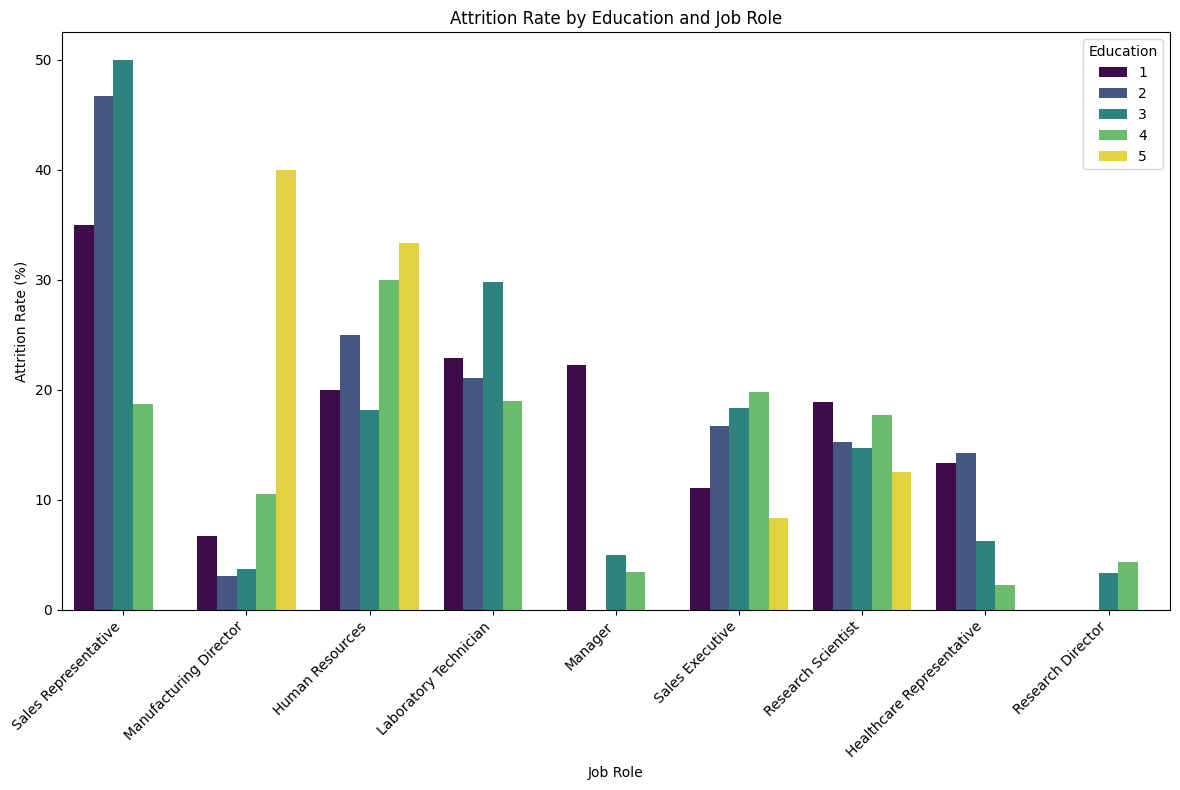

,Education,JobRole,Total_employee,Employees_Left,Attrition_Rate
26,3,Sales Representative,32,16.0,50.000000
17,2,Sales Representative,15,7.0,46.666667
40,5,Manufacturing Director,5,2.0,40.000000
8,1,Sales Representative,20,7.0,35.000000
37,5,Human Resources,3,1.0,33.333333


In [23]:
# Total number of employees
total_counts = edu_jobrole.groupby(['Education','JobRole']).size().reset_index(name='Total_employee')

# Filter only rows where Attrition is 'Yes'
left_counts = edu_jobrole[edu_jobrole['Attrition'] == 'Yes'].groupby(['Education', 'JobRole']).size().reset_index(name='Employees_Left')

# Merge both DataFrames
attrition_data = pd.merge(total_counts, left_counts, on=['Education', 'JobRole'], how='left')

# Fill NaN (where no one left) with 0
attrition_data['Employees_Left'] = attrition_data['Employees_Left'].fillna(0)

# Calculate attrition rate
attrition_data['Attrition_Rate'] = (attrition_data['Employees_Left'] / attrition_data['Total_employee']) * 100

# Sort by attrition rate
attrition_data.sort_values(by='Attrition_Rate', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=attrition_data,
    x='JobRole',
    y='Attrition_Rate',
    hue='Education',
    palette='viridis'
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Customize the plot
plt.title('Attrition Rate by Education and Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()
attrition_data.head()
#Sales Representatives have the highest attrition, especially those with education levels 2 and 3.
#Lower education levels (1–3) among Sales Representatives are correlated with higher attrition.
#Even senior roles like Manufacturing Director and HR experience attrition, though in smaller absolute numbers.
#Education level 5 (highest) doesn’t guarantee retention — even highly educated employees (like in HR and Manufacturing Director roles) still leave.

In [25]:
#4. Find if Employees with Low Performance Rating and High Training Times still leave.
perform_training_df = df[['PerformanceRating','TrainingTimesLastYear','Attrition']]
perform_training_df

,PerformanceRating,TrainingTimesLastYear,Attrition
0,3,0,Yes
1,4,3,No
2,3,3,Yes
3,3,3,No
4,3,3,No
...,...,...,...
1465,3,3,No
1466,3,5,No
1467,4,0,No
1468,3,3,No


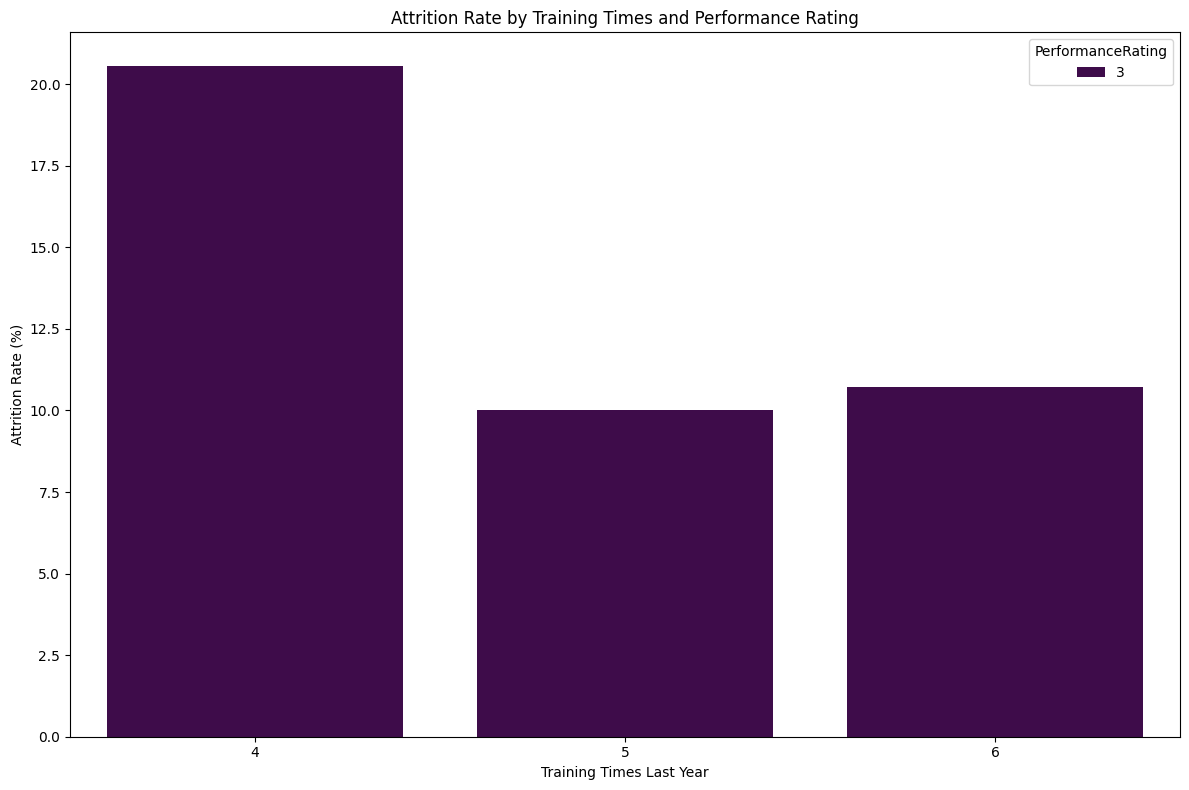

Attrition,TrainingTimesLastYear,PerformanceRating,No,Yes,Rate
0,4,3,85,22,20.560748
1,5,3,90,10,10.000000
2,6,3,50,6,10.714286


In [27]:
perform_training_df = perform_training_df[
    (perform_training_df['PerformanceRating'] == 3) & 
    (perform_training_df['TrainingTimesLastYear'] > 3)]

grb = perform_training_df.groupby(['TrainingTimesLastYear','PerformanceRating','Attrition']).value_counts().unstack()
grb['Rate'] = (grb['Yes'] / (grb['Yes'] + grb['No'])) * 100

plt.figure(figsize=(12, 8))
sns.barplot(
    data=grb.reset_index(),
    x='TrainingTimesLastYear',
    y='Rate',
    hue='PerformanceRating',
    palette='viridis'
)

# Customize the plot
plt.title('Attrition Rate by Training Times and Performance Rating')
plt.xlabel('Training Times Last Year')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()
grb.reset_index()

#Employees with 4 years of training and low performance are leaving at twice the rate compared to those trained for 5 or 6 years.
#More years of training (5 or 6) seem to improve retention, even among lower-performing employees.
#This implies that extended training may mitigate attrition risk for employees who are underperforming.

In [29]:
#8. Segment the Dataset by Age Groups:
#<30, 30–40, 40–50, >50
#and analyze how Attrition changes across age bands.

#segmenting lower_age data
lower_age = df[df['Age'] < 30]

#segmenting mid_age data
mid_age = df[(df['Age'] > 30) & (df['Age'] < 40)]

#segmenting higher_age data
high_age = df[df['Age'] > 50]
high_age

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeGroup
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,Q1
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,80,0,31,3,3,25,8,3,7,Q4
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,...,80,1,26,3,2,14,13,4,8,Q4
63,59,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,81,...,80,0,28,3,2,21,16,7,9,Q3
65,55,No,Travel_Rarely,836,Research & Development,8,3,Medical,1,84,...,80,3,21,2,3,5,0,0,2,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,55,No,Travel_Rarely,189,Human Resources,26,4,Human Resources,1,1973,...,80,1,35,0,3,10,9,1,4,Q4
1406,54,No,Travel_Rarely,157,Research & Development,10,3,Medical,1,1980,...,80,0,9,3,3,5,2,1,4,Q2
1434,52,No,Non-Travel,585,Sales,29,4,Life Sciences,1,2019,...,80,2,16,3,2,9,8,0,0,Q2
1441,56,No,Non-Travel,667,Research & Development,1,4,Life Sciences,1,2026,...,80,1,13,2,2,13,12,1,9,Q3


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20704\2358484375.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


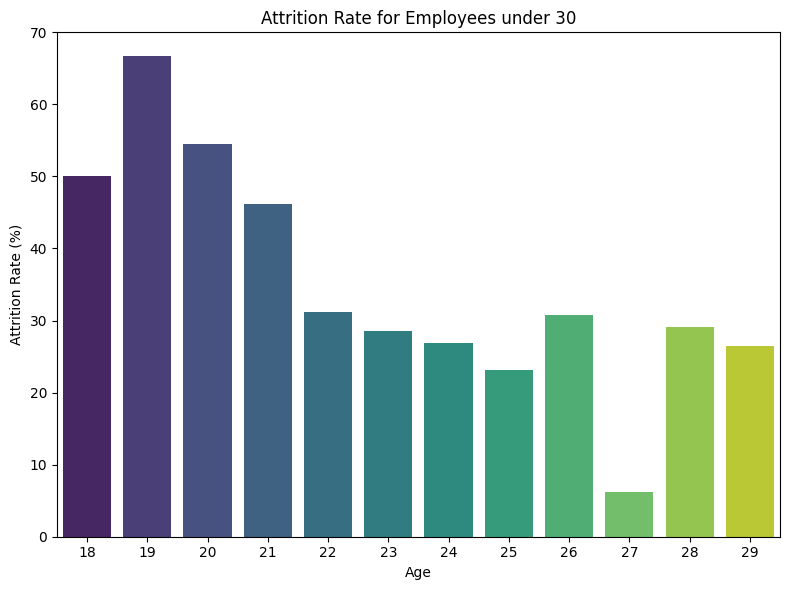

In [30]:
total_emp = df.groupby('Age')['Attrition'].size().reset_index(name='Total_employee')
left_lower_count = lower_age[lower_age['Attrition'] =='Yes'].groupby('Age')['Attrition'].size().reset_index(name='Employee_left')
left_lower_attr = pd.merge(left_lower_count,total_emp, how='left', on='Age')
left_lower_attr['Rate_left'] = (left_lower_attr['Employee_left'] / left_lower_attr['Total_employee']) * 100

plt.figure(figsize=(8, 6))
sns.barplot(
    data=left_lower_attr,
    x='Age',
    y='Rate_left',
    palette='viridis'
)

# Customize the plot
plt.title('Attrition Rate for Employees under 30')
plt.xlabel('Age')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()

left_lower_attr.sort_values(by='Rate_left', ascending=False, inplace=True)

#Younger employees (ages 18–22) have a high attrition rate.
#Attrition decreases steadily in the mid-20s (ages 23–27).
#It slightly increases again at age 28 and 29.
#Most stable age group appears to be 27 years old with the lowest attrition.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20704\4144409425.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


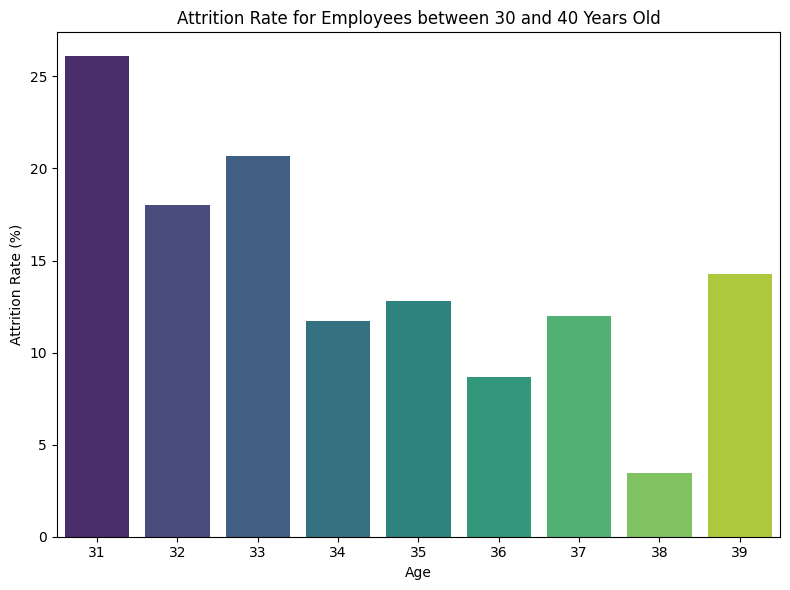

,Age,Employee_left,Total_employee,Rate_left
0,31,18,69,26.086957
2,33,12,58,20.689655
1,32,11,61,18.032787
8,39,6,42,14.285714
4,35,10,78,12.820513
6,37,6,50,12.000000
3,34,9,77,11.688312
5,36,6,69,8.695652
7,38,2,58,3.448276


In [31]:
left_mid_count = mid_age[mid_age['Attrition'] =='Yes'].groupby('Age')['Attrition'].size().reset_index(name='Employee_left')
left_mid_attr = pd.merge(left_mid_count,total_emp, how='left', on='Age')
left_mid_attr['Rate_left'] = (left_mid_attr['Employee_left'] / left_mid_attr['Total_employee']) * 100
left_mid_attr.sort_values(by='Rate_left', ascending=False, inplace=True)

# Plotting the attrition rate for employees between 30-40 years old
plt.figure(figsize=(8, 6))
sns.barplot(
    data=left_mid_attr,
    x='Age',
    y='Rate_left',
    palette='viridis'
)

# Customize the plot
plt.title('Attrition Rate for Employees between 30 and 40 Years Old')
plt.xlabel('Age')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()
left_mid_attr

#Age 31 has the highest attrition rate (26.09%).
#Attrition gradually decreases from age 32 to 38.
#Age 38 has the lowest attrition rate (3.45%).
#Overall, employees in their early 30s tend to leave more, while those in their late 30s are more stable.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20704\2265561261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


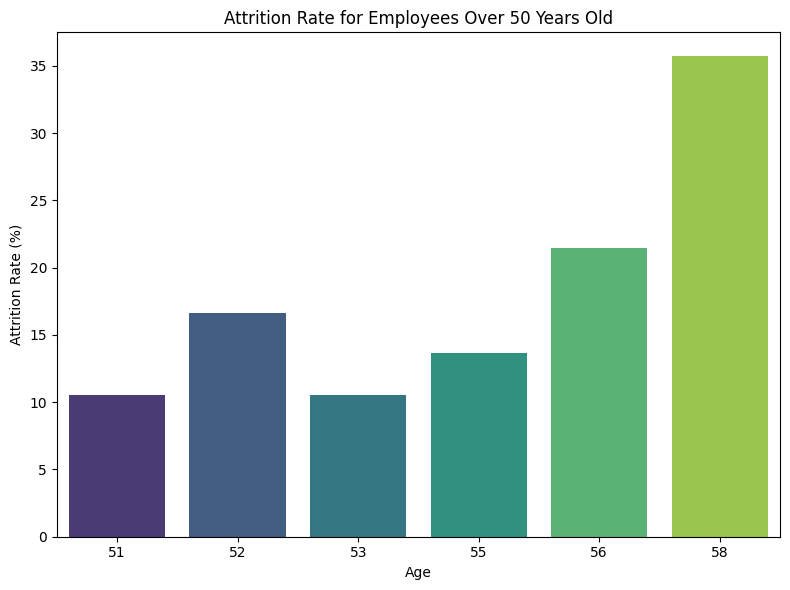

,Age,Employee_left,Total_employee,Rate_left
5,58,5,14,35.714286
4,56,3,14,21.428571
1,52,3,18,16.666667
3,55,3,22,13.636364
0,51,2,19,10.526316
2,53,2,19,10.526316


In [32]:
left_high_count = high_age[high_age['Attrition'] =='Yes'].groupby('Age')['Attrition'].size().reset_index(name='Employee_left')
left_high_attr = pd.merge(left_high_count,total_emp, how='left', on='Age')
left_high_attr['Rate_left'] = (left_high_attr['Employee_left'] / left_high_attr['Total_employee']) * 100
left_high_attr.sort_values(by='Rate_left', ascending=False, inplace=True)
plt.figure(figsize=(8, 6))
sns.barplot(
    data=left_high_attr,
    x='Age',
    y='Rate_left',
    palette='viridis'
)

# Customize the plot
plt.title('Attrition Rate for Employees Over 50 Years Old')
plt.xlabel('Age')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()
left_high_attr

#Employees aged 58 have the highest attrition rate (35.71%).
#Attrition decreases with younger ages in this group (51–55).
#Ages 51 to 53 have the lowest attrition rate (10.53%).
#Overall, older employees show moderate attrition, highest near retirement age (58).

Mean of Distance From Home : 15.0


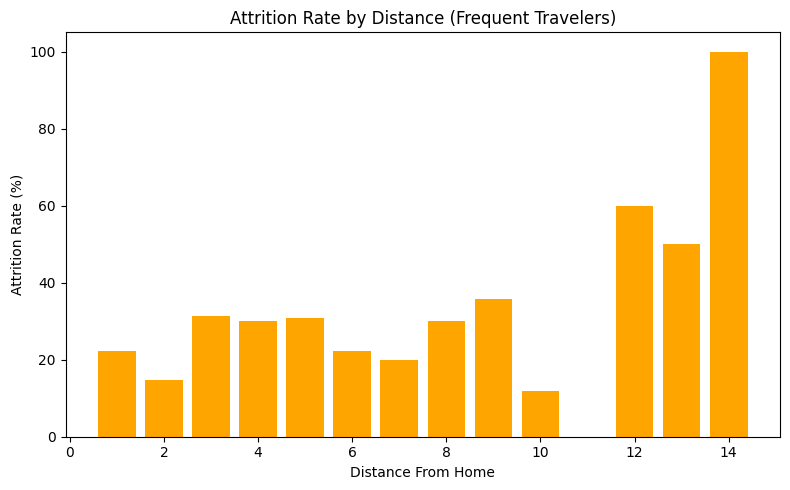

,DistanceFromHome,Employee_left,Total_employee,Rate_left
0,1,10,45,22.222222
1,2,6,41,14.634146
2,3,5,16,31.250000
3,4,3,10,30.000000
4,5,4,13,30.769231
5,6,2,9,22.222222
6,7,3,15,20.000000
7,8,3,10,30.000000
8,9,5,14,35.714286
9,10,2,17,11.764706


In [51]:
#7. Analyze Whether Employees who Travel Frequently and have High Distance From Home are Leaving More.
avg = df['DistanceFromHome'].sort_values().unique().mean()
print(f'Mean of Distance From Home : {avg}')
low_distance = df[(df['BusinessTravel'] == 'Travel_Frequently') & (df['DistanceFromHome'] < avg)]
total_emp = low_distance.groupby('DistanceFromHome')['Attrition'].size().reset_index(name='Total_employee')
low_distance = low_distance[low_distance['Attrition'] =='Yes'].groupby('DistanceFromHome')['Attrition'].size().reset_index(name='Employee_left')
low_distance = pd.merge(low_distance,total_emp, on='DistanceFromHome', how='left')
low_distance['Rate_left'] = (low_distance['Employee_left'] / low_distance['Total_employee']) * 100
low_distance.sort_values(by='Rate_left', ascending=False).reset_index().head()

plt.figure(figsize=(8, 5))
plt.bar(low_distance['DistanceFromHome'], low_distance['Rate_left'], color='orange')
plt.xlabel('Distance From Home')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Distance (Frequent Travelers)')
plt.tight_layout()
plt.show()
low_distance

#Attrition is highest for employees living 14 units from home (100%), followed by 12 (60%) and 13 (50%) — though these groups are very small.
#More stable distances are 10 units (11.76%) and 2 units (14.63%).
#Moderate attrition (around 30%) occurs at several distances: 3, 4, 5, and 8.
#Overall, attrition doesn't decrease consistently with distance — some employees close to the office still leave frequently.

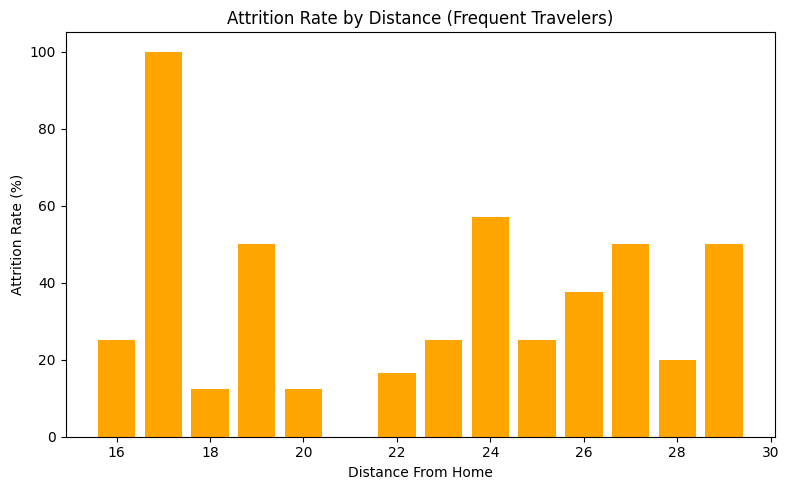

,DistanceFromHome,Total_employee
0,16,4
1,17,2
2,18,8
3,19,2
4,20,8
5,21,2
6,22,6
7,23,4
8,24,7
9,25,4


In [52]:
high_distance = df[(df['BusinessTravel'] == 'Travel_Frequently') & (df['DistanceFromHome'] > avg)]
total_emp = high_distance.groupby('DistanceFromHome')['Attrition'].size().reset_index(name='Total_employee')
high_distance = high_distance[high_distance['Attrition'] =='Yes'].groupby('DistanceFromHome')['Attrition'].size().reset_index(name='Employee_left')
high_distance = pd.merge(high_distance,total_emp, on='DistanceFromHome', how='left')
high_distance['Rate_left'] = (high_distance['Employee_left'] / high_distance['Total_employee']) * 100
high_distance.sort_values(by='Rate_left', ascending=False).reset_index().head()
plt.figure(figsize=(8, 5))
plt.bar(high_distance['DistanceFromHome'], high_distance['Rate_left'], color='orange')
plt.xlabel('Distance From Home')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Distance (Frequent Travelers)')
plt.tight_layout()
plt.show()
high_distance
total_emp

#Distance 17 shows the highest attrition rate (100%), followed by 24 (57.14%), and 19, 27, 29 (50%) — though most have very small sample sizes.
#Lower attrition is seen at distances 18 and 20 (12.5%) and 22 (16.67%).
#Attrition is moderate (20–37%) for most other distances.
#Overall, attrition fluctuates and does not show a clear trend with increasing distance.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20704\1983159199.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


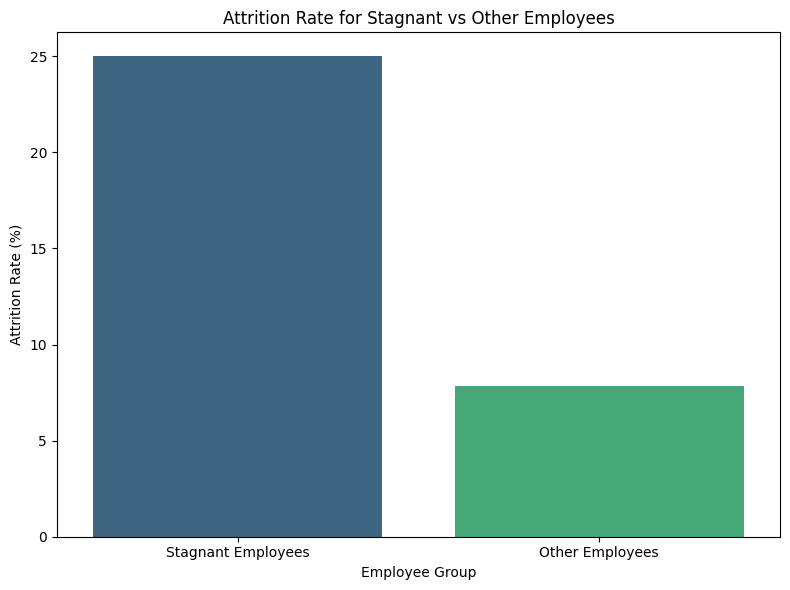

Attrition Rate for Stagnant Employees: 25.0%
Attrition Rate for Other Employees: 7.851239669421488%


In [33]:
#6. Identify if Attrition is higher for Employees with:
#Less than 2 Years in Current Role AND More than 10 Years in the Company.
#(Indicating possible stagnation.)

stagnant_employee = df[(df['YearsInCurrentRole'] < 2) & (df['YearsAtCompany'] > 10)]
stagnant_employee_attr_rate = stagnant_employee['Attrition'].value_counts(normalize=True).get('Yes',0) * 100
stagnant_employee_attr_rate

other_employee = df[~(df['YearsInCurrentRole'] < 2) & (df['YearsAtCompany'] > 10)]
other_employee_attr_rate = other_employee['Attrition'].value_counts(normalize=True).get('Yes',0) * 100
other_employee_attr_rate

attrition_data = {
    'Employee Group': ['Stagnant Employees', 'Other Employees'],
    'Attrition Rate': [stagnant_employee_attr_rate, other_employee_attr_rate]
}

# Create a DataFrame
attrition_df = pd.DataFrame(attrition_data)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=attrition_df,
    x='Employee Group',
    y='Attrition Rate',
    palette='viridis'
)

# Customize the plot
plt.title('Attrition Rate for Stagnant vs Other Employees')
plt.xlabel('Employee Group')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()
print(f"Attrition Rate for Stagnant Employees: {stagnant_employee_attr_rate}%")
print(f"Attrition Rate for Other Employees: {other_employee_attr_rate}%")

#Attrition is significantly higher (over 3 times) for employees who:
#Have less than 2 years in their current role
#But have spent more than 10 years at the company

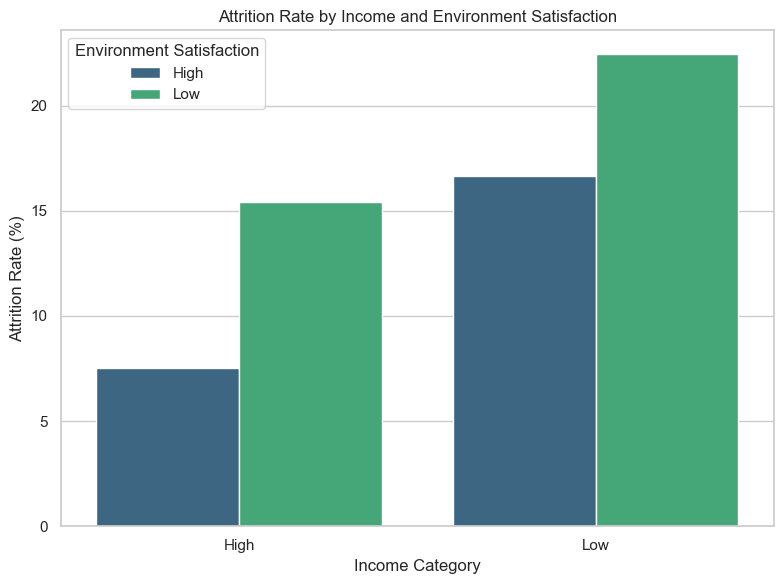

Attrition,IncomeCategory,SatisfactionCategory,No,Yes,Attr_rate
0,High,High,282,23,7.540984
1,High,Low,159,29,15.425532
2,Low,High,495,99,16.666667
3,Low,Low,297,86,22.454308


In [ ]:
#5. Check if Employees with High Environment Satisfaction but Low Income still leave.
avg_income = df['MonthlyIncome'].mean()

df['IncomeCategory'] = df['MonthlyIncome'].apply(lambda x: 'Low' if x < avg_income else 'High')
df['SatisfactionCategory'] = df['EnvironmentSatisfaction'].apply(lambda x: 'High' if x > 2 else 'Low')

attr_group = df.groupby(['IncomeCategory','SatisfactionCategory'])['Attrition'].value_counts().unstack()
attr_group['Attr_rate'] = (attr_group['Yes'] / (attr_group['Yes'] + attr_group['No'])) * 100
attr_group.reset_index(inplace=True)
a = attr_group[(attr_group['IncomeCategory'] == 'Low') & (attr_group['SatisfactionCategory'] == 'High')]


sns.set_theme(style="whitegrid")

# Create a bar plot for all income + satisfaction combinations
plt.figure(figsize=(8, 6))
sns.barplot(
    data=attr_group,
    x='IncomeCategory',
    y='Attr_rate',
    hue='SatisfactionCategory',
    palette='viridis'
)

plt.title('Attrition Rate by Income and Environment Satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Income Category')
plt.legend(title='Environment Satisfaction')
plt.tight_layout()
plt.show()
attr_group

#Employees may still leave even if they're satisfied with their work environment — if their income is low.
#This suggests that salary is a strong driver of attrition, potentially more so than satisfaction in isolation.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20704\41558998.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


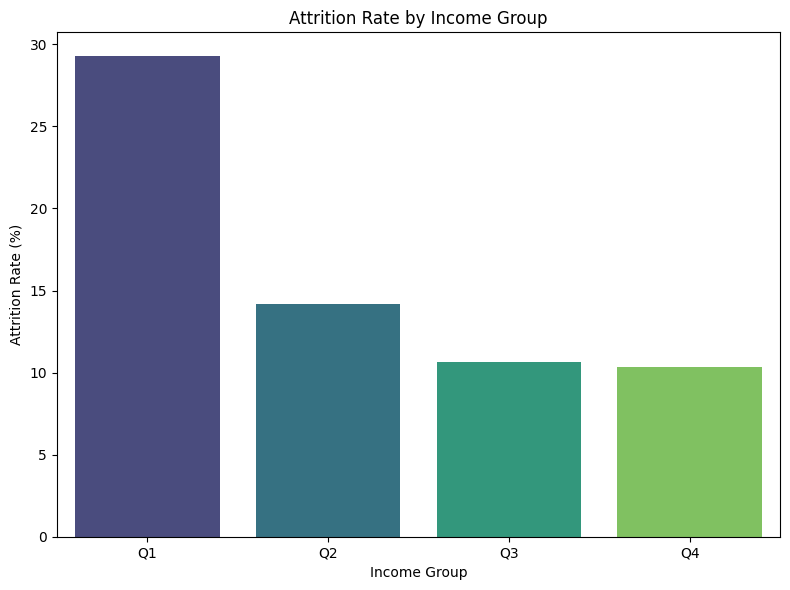

Attrition,IncomeGroup,No,Yes,Rate
0,Q1,261,108,29.268293
1,Q2,314,52,14.207650
2,Q3,328,39,10.626703
3,Q4,330,38,10.326087


In [16]:
#9. Check if there is a "Sweet Spot" for Monthly Income where Attrition is lowest (mid-range salaries).
df['MonthlyIncome'].quantile([0.25, 0.5, 0.75])
q1 = df['MonthlyIncome'].quantile(0.25)
q2 = df['MonthlyIncome'].quantile(0.5)
q3 = df['MonthlyIncome'].quantile(0.75)

def label_income(val):
    if val <= q1:
        return 'Q1'
    elif val <= q2:
        return 'Q2'
    elif val <= q3:
        return 'Q3'
    else:
        return 'Q4'
df['IncomeGroup'] = df['MonthlyIncome'].apply(label_income)

attr_ = df.groupby('IncomeGroup')['Attrition'].value_counts().unstack()
attr_.reset_index(inplace=True)
attr_['Rate'] = ( attr_['Yes']/(attr_['Yes'] + attr_['No'])) * 100


# Create the plot for attrition rate by income group
plt.figure(figsize=(8, 6))
sns.barplot(
    data=attr_,
    x='IncomeGroup',
    y='Rate',
    palette='viridis'
)

# Customize the plot
plt.title('Attrition Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()
attr_

#The sweet spot is in Q3 or Q4 — mid-to-high income ranges — where attrition is lowest.
#Employees in these salary ranges are most likely to stay.